In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers

In [4]:
# Prepping data

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0 # normalizing image data between 0 and 1

170500096/170498071 [==============================] - 4s 0us/step


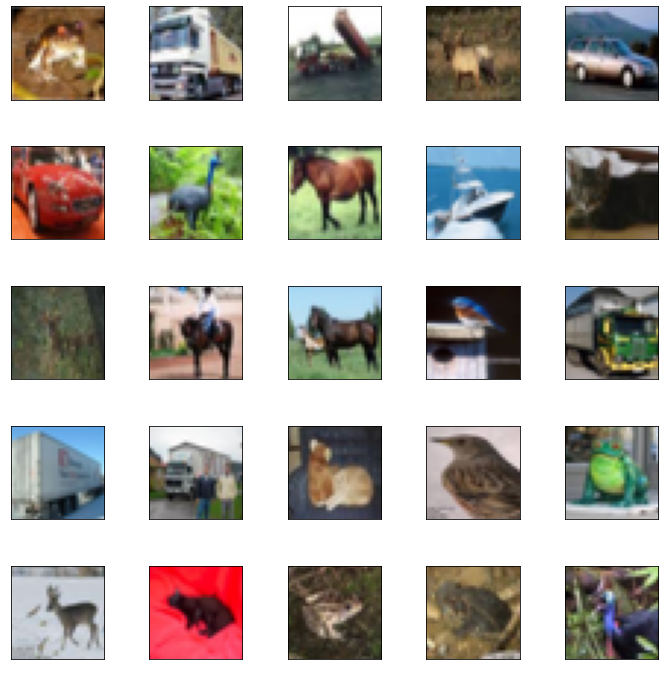

In [28]:
# Data verification (display images to make sure data looks correct)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
def display_grid(images, labels, width_inches, height_inches, cells_wide, cells_high):
    plt.figure(figsize=(width_inches, height_inches))
    plt.subplots_adjust(hspace=0.5) # spacing so labels are visible
    for i in range(cells_wide * cells_high):
        plt.subplot(cells_high, cells_wide, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(class_names[labels[i][0]], color='white') # have vs code dark mode
        plt.imshow(images[i])
    plt.show()

display_grid(train_images, train_labels, 12, 12, 5, 5)

In [29]:
# Creating the classifier model, very basic version

model = tf.keras.models.Sequential([
    layers.Conv2D(
        filters=32,
        kernel_size=(5, 5),
        activation='relu',
        input_shape=(32, 32, 3),
    ),
    layers.Dropout(0.3),
    layers.Conv2D(
        filters=64,
        kernel_size=(5, 5),
        activation='relu',
    ),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(10)
])


In [32]:
# Initial test

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)
history = model.fit(
    x=train_images,
    y=train_labels,
    validation_split=0.3,
    epochs=1000,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=3,
        )
    ]
)

Epoch 1/1000
1094/1094 [==============================] - 6s 5ms/step - loss: 0.6000 - accuracy: 0.7889 - val_loss: 0.5344 - val_accuracy: 0.8135
Epoch 2/1000
1094/1094 [==============================] - 5s 5ms/step - loss: 0.5948 - accuracy: 0.7938 - val_loss: 0.4935 - val_accuracy: 0.8335
Epoch 3/1000
1094/1094 [==============================] - 5s 5ms/step - loss: 0.5886 - accuracy: 0.7936 - val_loss: 0.5625 - val_accuracy: 0.8091
Epoch 4/1000
1094/1094 [==============================] - 5s 5ms/step - loss: 0.5831 - accuracy: 0.7946 - val_loss: 0.5050 - val_accuracy: 0.8255
Epoch 5/1000
1094/1094 [==============================] - 5s 5ms/step - loss: 0.5747 - accuracy: 0.7982 - val_loss: 0.5574 - val_accuracy: 0.8075


In [34]:
# Time to redo the model to improve accuracy.

model = tf.keras.models.Sequential([
    layers.Conv2D(
        filters=32, # Will try increasing this later, just want to hold it still while tweaking other things
        kernel_size=(8, 8), # gut feeling, each kernel hitting 1/16 of the image
        activation='relu', # standard activation function for this type of thing, might mix up later
        input_shape=(32, 32, 3),
    ),
    layers.Dropout(0.2), # Dropping this, suspicious it's the source of problems.
    layers.Conv2D(
        filters=64, # Will tweak later
        kernel_size=(4, 4), # going with 4 so each kernel is effectively looking at the full picure at this layer
        activation='relu', #again, standard for the area
    ),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(10)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 32)        6176      
_________________________________________________________________
dropout_4 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        32832     
_________________________________________________________________
dropout_5 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                309770    
Total params: 348,778
Trainable params: 348,778
Non-trainable params: 0
________________________________________________